In [135]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
pd.options.display.max_columns = 500

## Load & look at data

In [136]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

((46513, 3), (44370, 3), (59297, 3), (273, 33), (590, 16))

In [152]:
# merging lifespan population
df = income.merge(lifespan).merge(population)

#df = pd.merge(income,lifespan)
#df = pd.merge(df, population)  

In [145]:
df.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total
0,afg,1800,603,28.21,3280000
1,afg,1801,603,28.20,3280000
2,afg,1802,603,28.19,3280000
3,afg,1803,603,28.18,3280000
4,afg,1804,603,28.17,3280000


In [153]:
#countynameworld_region
things_we_want = entities[['country','world_6region','name']] 

df = pd.merge(df, things_we_want, left_on='geo', right_on='country')

In [148]:
df.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,world_6region,name
0,afg,1800,603,28.21,3280000,afg,south_asia,Afghanistan
1,afg,1801,603,28.20,3280000,afg,south_asia,Afghanistan
2,afg,1802,603,28.19,3280000,afg,south_asia,Afghanistan
3,afg,1803,603,28.18,3280000,afg,south_asia,Afghanistan
4,afg,1804,603,28.17,3280000,afg,south_asia,Afghanistan


In [154]:
df = df.drop(columns=['geo', 'country'], axis='columns')

df.head()

,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,world_6region,name
0,1800,603,28.21,3280000,south_asia,Afghanistan
1,1801,603,28.20,3280000,south_asia,Afghanistan
2,1802,603,28.19,3280000,south_asia,Afghanistan
3,1803,603,28.18,3280000,south_asia,Afghanistan
4,1804,603,28.17,3280000,south_asia,Afghanistan


In [155]:

df = df.rename(columns={
    'time': 'year'
    , 'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income'
    , 'life_expectancy_years': 'lifespan'
    , 'population_total': 'population'
    , 'world_6region': 'region'
    , 'name' : 'country'
})

df.head()

,year,income,lifespan,population,region,country
0,1800,603,28.21,3280000,south_asia,Afghanistan
1,1801,603,28.20,3280000,south_asia,Afghanistan
2,1802,603,28.19,3280000,south_asia,Afghanistan
3,1803,603,28.18,3280000,south_asia,Afghanistan
4,1804,603,28.17,3280000,south_asia,Afghanistan


In [157]:
df['region'] = df['region'].replace('_', ' ', regex=True).str.title()
df.head()

,year,income,lifespan,population,region,country
0,1800,603,28.21,3280000,South Asia,Afghanistan
1,1801,603,28.20,3280000,South Asia,Afghanistan
2,1802,603,28.19,3280000,South Asia,Afghanistan
3,1803,603,28.18,3280000,South Asia,Afghanistan
4,1804,603,28.17,3280000,South Asia,Afghanistan


## Explore data

In [158]:
df.skew()

year          -0.005098
income         6.300582
lifespan       0.825236
population    13.031487
dtype: float64

In [159]:
df.describe(exclude='number')

,region,country
count,40437,40437
unique,6,187
top,Europe Central Asia,Canada
freq,10778,219


In [167]:
usa = df[df['country'] == 'United States']
usa.head()

,year,income,lifespan,population,region,country
38028,1800,2127,39.41,6801854,America,United States
38029,1801,2167,39.41,6933517,America,United States
38030,1802,2202,39.41,7067728,America,United States
38031,1803,2166,39.41,7204538,America,United States
38032,1804,2165,39.41,7343995,America,United States


In [168]:
usa[usa['year'].isin([1818, 1918, 2018])]

,year,income,lifespan,population,region,country
38046,1818,2258,39.41,9879049,America,United States
38146,1918,9371,47.18,106721812,America,United States
38246,2018,54898,79.14,326766748,America,United States


In [170]:
china = df[df['country'] == 'China']
china[china['year'].isin([1818, 1918, 2018])]

,year,income,lifespan,population,region,country
6854,1818,985,32.00,374161494,East Asia Pacific,China
6954,1918,989,22.13,462444535,East Asia Pacific,China
7054,2018,16018,76.92,1415045928,East Asia Pacific,China


## Plot visualization

In [171]:
present = df[df['year']==2018]
present.head()

,year,income,lifespan,population,region,country
218,2018,1867,58.69,36373176,South Asia,Afghanistan
437,2018,5846,65.19,30774205,Sub Saharan Africa,Angola
656,2018,12424,78.01,2934363,Europe Central Asia,Albania
922,2018,68231,76.89,9541615,Middle East North Africa,United Arab Emirates
1141,2018,18942,76.97,44688864,America,Argentina


## Analyze outliers

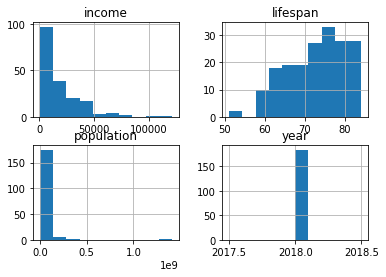

In [172]:
#pd.plotting.scatter_matrix(present);
#crap plot
present.hist();

## Plot multiple years

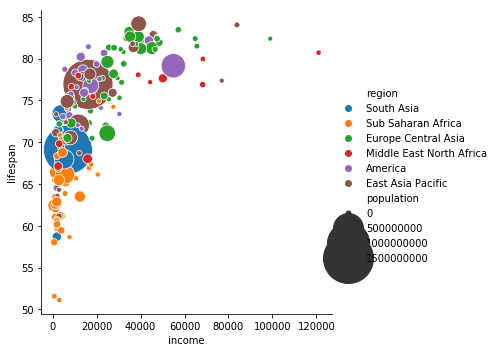

In [180]:
sns.relplot(x='income', y='lifespan', hue='region', size='population', data=present,sizes=(25, 2500))

In [174]:
present['log_income'] = np.log(present['income'])

/home/gunther/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


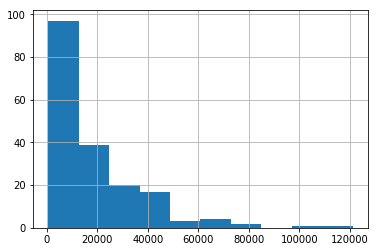

In [65]:
present.income.hist()

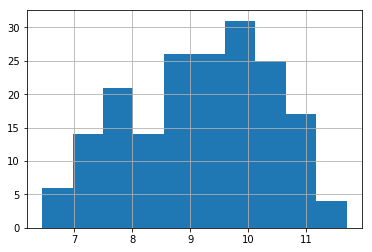

In [66]:
present.log_income.hist()

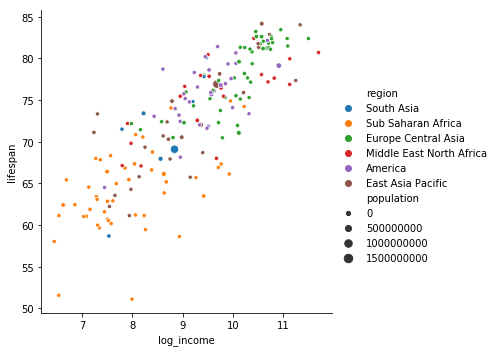

In [67]:
sns.relplot(x='log_income', y='lifespan', hue='region', size='population', data=present)

In [68]:
present[present['log_income'] >= 11].sort_values(by='log_income')

,year,income,lifespan,population,region,name,log_income
27296,2018,64846,82.39,5353363,Europe Central Asia,Norway,11.079771
16956,2018,65622,81.49,4803748,Europe Central Asia,Ireland,11.091666
922,2018,68231,76.89,9541615,Middle East North Africa,United Arab Emirates,11.130654
20241,2018,68359,79.96,4197128,Middle East North Africa,Kuwait,11.132529
5521,2018,76943,77.36,434076,East Asia Pacific,Brunei,11.250820
31895,2018,83888,84.03,5791901,East Asia Pacific,Singapore,11.337238
22212,2018,99034,82.39,590321,Europe Central Asia,Luxembourg,11.503219
30362,2018,121033,80.71,2694849,Middle East North Africa,Qatar,11.703819


In [72]:
qatar = present[present['name'] == 'Qatar']
qatar_income = qatar['log_income'].values[0]
#qatar_income = qatar['log_income'].iloc[0]
qatar_lifespan =qatar['lifespan'].values[0]
print(qatar_income)



11.703818514668283


Text(0.5, 1.0, 'Qatar is all good')

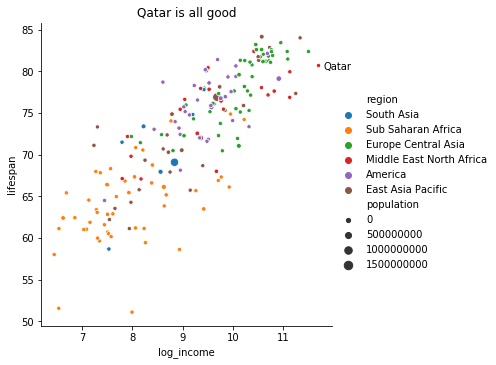

In [75]:
sns.relplot(x='log_income', y='lifespan', hue='region', size='population', data=present)

plt.text(x=qatar_income+.1,y=qatar_lifespan-.5,s='Qatar')
plt.title("Qatar is all good")

## Point out a story

# ASSIGNMENT
Replicate the lesson code

# STRETCH OPTIONS

## 1. Animate!
- [Making animations work in Google Colaboratory](https://medium.com/lambda-school-machine-learning/making-animations-work-in-google-colaboratory-new-home-for-ml-prototyping-c6147186ae75)
- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)

## 2. Work on anything related to your portfolio site / project